In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:

df1 = pd.read_csv('1_SalesEffectDownLoad.csv')

# feature names renamed based on analysis of data.
names = ['t_Create','c_Product_ID','c_Source','c_Mobile','c_EMAIL','c_Sales_Agent',
         'c_Location','c_Delivery_Mode','y_Status']
df1.columns = names

df1.head()

,t_Create,c_Product_ID,c_Source,c_Mobile,c_EMAIL,c_Sales_Agent,c_Location,c_Delivery_Mode,y_Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


# Data Sanity checks - Finding, deleting or updating the incorrigible cells/rows

In [3]:
df1.shape

(7422, 9)

In [4]:
# All categorical show as objects as they are categorical string.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
t_Create           7422 non-null object
c_Product_ID       7364 non-null float64
c_Source           7405 non-null object
c_Mobile           5612 non-null object
c_EMAIL            7422 non-null object
c_Sales_Agent      7399 non-null object
c_Location         7364 non-null object
c_Delivery_Mode    7422 non-null object
y_Status           7422 non-null object
dtypes: float64(1), object(8)
memory usage: 521.9+ KB


# Closer look at columns based on Domian knowledge
## As per the Data analysis work sheet we find the columns - t_Create,c_Mobile,c_EMAIL as not useful so can be deleted

## Data Analysis
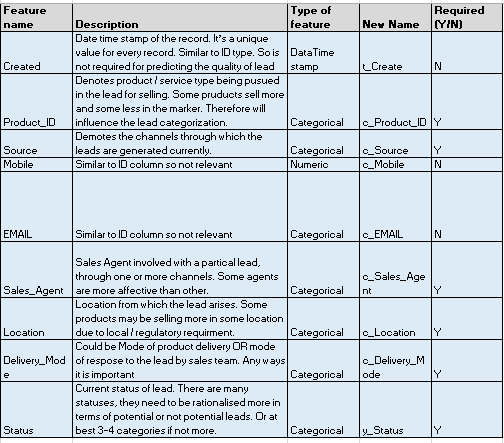

In [5]:
df1.columns

Index(['t_Create', 'c_Product_ID', 'c_Source', 'c_Mobile', 'c_EMAIL',
       'c_Sales_Agent', 'c_Location', 'c_Delivery_Mode', 'y_Status'],
      dtype='object')

In [6]:
# Create All lists
AllColumns = ['c_Product_ID', 'c_Source','c_Sales_Agent', 
              'c_Location', 'c_Delivery_Mode', 'y_Status']

# No Continuous Columns
ConColList=[]

CatColList = ['c_Product_ID', 'c_Source','c_Sales_Agent', 
              'c_Location', 'c_Delivery_Mode']


# Instead of deleting created a new data frame without t_Create,c_Mobile,c_EMAIL
df2=df1[AllColumns] 

print("We expect no decrease in records, only in decrease of 3 columns is expected")
print("Before deleting the columns: ", df1.shape)
print("After deleting the columns: ", df2.shape)

We expect no decrease in records, only in decrease of 3 columns is expected
Before deleting the columns:  (7422, 9)
After deleting the columns:  (7422, 6)


# Analyse records to be deleted and treatment of nulls

In [7]:
#Check Isnull and isna - no blanks or nans
print(df2.isna().sum(), df2.isnull().sum())

c_Product_ID       58
c_Source           17
c_Sales_Agent      23
c_Location         58
c_Delivery_Mode     0
y_Status            0
dtype: int64 c_Product_ID       58
c_Source           17
c_Sales_Agent      23
c_Location         58
c_Delivery_Mode     0
y_Status            0
dtype: int64


## Domain inputs on ratinalizing of status values ( The analysis is before any deletions.. so there is some differece in data counts

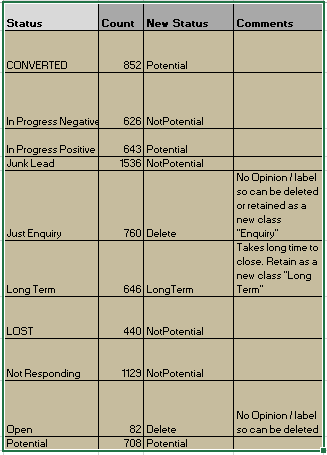


In [8]:
#Check product ID with y_Status
# Give total no of all the rows for which any of the 4 below columns have nan values 
print(Counter(df2[df2['c_Product_ID'].isna()  | df2['c_Source'].isna() |
            df2['c_Sales_Agent'].isna() | df2['c_Location'].isna()].y_Status))

print("\nTotal rows having nan in its row : ",df2[df2['c_Product_ID'].isna()  | df2['c_Source'].isna() |
            df2['c_Sales_Agent'].isna() | df2['c_Location'].isna()].shape[0])

# Looking at the data follwing is the inference
# 1) Most of the records have status as "open","Just Enquiry" and "Not Responding". 
#     They are not an catgory of interest for us, so they can be deleted
# 2) Others are very few so we can safely delete all of them. A total of 94 records will be deleted

Counter({'Open': 63, 'Not Responding': 10, 'Just Enquiry': 9, 'Junk Lead': 4, 'Potential': 3, 'Long Term': 2, 'In Progress Positive': 1, 'In Progress Negative': 1, 'LOST': 1})

Total rows having nan in its row :  94


## Before any deletion lets check if we can reduce the deletions

### Product ID 

In [9]:
# product Ids cannot be estimated and all have to be deleted 58 rows
Counter(df2[df2['c_Product_ID'].isna()].y_Status)

Counter({'Open': 49,
         'In Progress Positive': 1,
         'Junk Lead': 2,
         'Just Enquiry': 3,
         'Not Responding': 2,
         'Long Term': 1})

### Source 

In [10]:

# print all categoiries of sources - we see there is a category - "Other"
print("\n",Counter(df2.c_Source))

# get all rows where Source has null - 17 nans
print("\n",Counter(df2[df2['c_Source'].isna()].c_Source))

# study the split of the statuses across these 17 nans
print("\n",Counter(df2[df2['c_Source'].isna()].y_Status))

# Conclusion - instead of deleting we can update all these records to "Other"

# Update Source to Other
df2.loc[df2['c_Source'].isna(),['c_Source']] = 'Other'

## Check Status after the update - 19 in others
print("\n After",Counter(df2.c_Source))




 Counter({'Call': 2547, 'Live Chat-Direct': 1834, 'Website': 1594, 'Live Chat-Google Organic': 274, 'Live Chat -PPC': 249, 'Live Chat-Blog': 237, 'Customer Referral': 180, 'US Website': 137, 'Just Dial': 56, 'Existing Client': 51, 'Live Chat-CPC': 50, 'Personal Contact': 50, 'By Recommendation': 32, 'CRM form': 23, 'Existing Customer': 22, 'Live Chat-Google Ads': 21, 'Campaign': 19, nan: 17, 'E-mail Campaign': 12, 'Live Chat-Adwords Remarketing': 7, 'Live Chat-Quora': 2, 'Other': 2, 'SMS Campaign': 2, 'Live Chat-Youtube': 2, 'E-Mail Message': 1, 'Live Chat-Justdial': 1})

 Counter({nan: 17})

 Counter({'Open': 10, 'Not Responding': 2, 'Just Enquiry': 1, 'Junk Lead': 1, 'In Progress Negative': 1, 'LOST': 1, 'Potential': 1})

 After Counter({'Call': 2547, 'Live Chat-Direct': 1834, 'Website': 1594, 'Live Chat-Google Organic': 274, 'Live Chat -PPC': 249, 'Live Chat-Blog': 237, 'Customer Referral': 180, 'US Website': 137, 'Just Dial': 56, 'Existing Client': 51, 'Live Chat-CPC': 50, 'Person

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Location

In [11]:
# print all categoiries of sources - we see there is a category - "Other"
print("\n",Counter(df2.c_Location))

# get all rows where Source has null - 17 nans
print("\n",Counter(df2[df2['c_Location'].isna()].c_Location))

# study the split of the statuses across these 17 nans
print("\n",Counter(df2[df2['c_Location'].isna()].y_Status))

# Conclusion - instead of deleting we can update all these records to "Other"

# Update Location to Other
df2.loc[df2['c_Location'].isna(),['c_Location']] = 'Other Locations'

## Check Status after the update - 58 in other Location (2558)
print("\n After",Counter(df2.c_Location))


 Counter({'Other Locations': 2500, 'Bangalore': 2084, 'Chennai': 909, 'Hyderabad': 528, 'Delhi': 471, 'Mumbai': 402, 'Pune': 142, 'UAE': 79, nan: 58, 'Trivandrum': 58, 'Kolkata': 55, 'USA': 45, 'UK': 41, 'AUSTRALIA': 25, 'Singapore': 17, 'Malaysia': 4, 'EUROPE': 3, 'Howrah': 1})

 Counter({nan: 58})

 Counter({'Open': 49, 'Not Responding': 4, 'Just Enquiry': 3, 'Long Term': 1, 'Junk Lead': 1})

 After Counter({'Other Locations': 2558, 'Bangalore': 2084, 'Chennai': 909, 'Hyderabad': 528, 'Delhi': 471, 'Mumbai': 402, 'Pune': 142, 'UAE': 79, 'Trivandrum': 58, 'Kolkata': 55, 'USA': 45, 'UK': 41, 'AUSTRALIA': 25, 'Singapore': 17, 'Malaysia': 4, 'EUROPE': 3, 'Howrah': 1})


### Sales Agent 

In [12]:
# print all categoiries of sources - we see there is a category - "Other"
print("\n",Counter(df2.c_Sales_Agent))

# get all rows where Source has null - 17 nans
print("\n",Counter(df2[df2['c_Sales_Agent'].isna()].c_Sales_Agent))

# study the split of the statuses across these 17 nans
print("\n",Counter(df2[df2['c_Sales_Agent'].isna()].y_Status))

# Conclusion - instead of deleting we can update all these records to "Other"

# Update Sales Agent to Other
df2.loc[df2['c_Sales_Agent'].isna(),['c_Sales_Agent']] = 'Sales-Agent-Other'

## Check Status after the update - 23 in Sales-Agent-Other (23)
print("\n After",Counter(df2.c_Sales_Agent))


 Counter({'Sales-Agent-4': 1500, 'Sales-Agent-11': 1420, 'Sales-Agent-5': 1190, 'Sales-Agent-9': 879, 'Sales-Agent-3': 781, 'Sales-Agent-7': 736, 'Sales-Agent-2': 389, 'Sales-Agent-12': 269, 'Sales-Agent-6': 114, 'Sales-Agent-8': 68, 'Sales-Agent-10': 49, nan: 23, 'Sales-Agent-1': 4})

 Counter({nan: 23})

 Counter({'Open': 14, 'Just Enquiry': 4, 'Not Responding': 3, 'Potential': 2})

 After Counter({'Sales-Agent-4': 1500, 'Sales-Agent-11': 1420, 'Sales-Agent-5': 1190, 'Sales-Agent-9': 879, 'Sales-Agent-3': 781, 'Sales-Agent-7': 736, 'Sales-Agent-2': 389, 'Sales-Agent-12': 269, 'Sales-Agent-6': 114, 'Sales-Agent-8': 68, 'Sales-Agent-10': 49, 'Sales-Agent-Other': 23, 'Sales-Agent-1': 4})


### final Checks before deletion 

In [13]:
# total rows
print("Total rows with NAN in any of their columns",df2[df2['c_Product_ID'].isna()  | df2['c_Source'].isna() |
            df2['c_Sales_Agent'].isna() | df2['c_Location'].isna()].shape[0])

print("Split of statuses Counter:",df2[df2['c_Product_ID'].isna()].shape[0])

#Check Isnull and isna - no blanks or nans
print(df2.isna().sum())

Total rows with NAN in any of their columns 58
Split of statuses Counter: 58
c_Product_ID       58
c_Source            0
c_Sales_Agent       0
c_Location          0
c_Delivery_Mode     0
y_Status            0
dtype: int64


### Drop rows

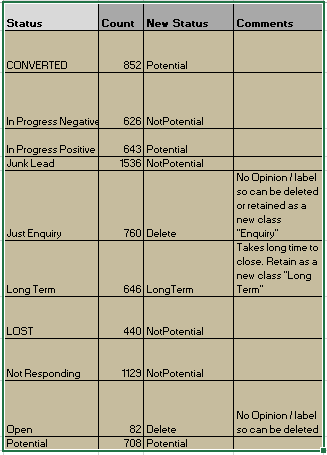

In [14]:
# Delete rows with status as "Just Enquiry" & "Open"
print('before delete of status:',df2.shape)
df2 = df2.loc[(df2.y_Status != "Just Enquiry") & (df2.y_Status != "Open"),:]
print('after delete of status:',df2.shape) # 842 records were deleted

# 6 rows with Nan in product ID, get deleted
print('before :',df2.shape)
df2.dropna(inplace=True)
print('after :',df2.shape)

# Checks nulls
print(df2.isna().sum(), df2.isnull().sum())

before delete of status: (7422, 6)
after delete of status: (6580, 6)
before : (6580, 6)
after : (6574, 6)
c_Product_ID       0
c_Source           0
c_Sales_Agent      0
c_Location         0
c_Delivery_Mode    0
y_Status           0
dtype: int64 c_Product_ID       0
c_Source           0
c_Sales_Agent      0
c_Location         0
c_Delivery_Mode    0
y_Status           0
dtype: int64


In [15]:
# Data types look good
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6574 entries, 18 to 7421
Data columns (total 6 columns):
c_Product_ID       6574 non-null float64
c_Source           6574 non-null object
c_Sales_Agent      6574 non-null object
c_Location         6574 non-null object
c_Delivery_Mode    6574 non-null object
y_Status           6574 non-null object
dtypes: float64(1), object(5)
memory usage: 359.5+ KB


### Rename Statuses

In [16]:
df2.loc[(df2.y_Status == "CONVERTED"),['y_Status']]            = "3_HighPotential"
df2.loc[(df2.y_Status == "In Progress Negative"),['y_Status']] = "0_NotPotential"
df2.loc[(df2.y_Status == "In Progress Positive"),['y_Status']] = "1_Potential"
df2.loc[(df2.y_Status == "Junk Lead"),['y_Status']]            = "0_NotPotential"
#df2.loc[(df2.y_Status == "Just Enquiry"),['y_Status']]         = "0_NotPotential"
df2.loc[(df2.y_Status == "Long Term"),['y_Status']]            = "2_PotentialLongTerm"
df2.loc[(df2.y_Status == "LOST"),['y_Status']]                 = "0_NotPotential"
df2.loc[(df2.y_Status == "Not Responding"),['y_Status']]       = "0_NotPotential"
df2.loc[(df2.y_Status == "converted"),['y_Status']]            = "3_HighPotential"
df2.loc[(df2.y_Status == "Potential"),['y_Status']]            = "1_Potential"


Counter(df2.y_Status)


Counter({'1_Potential': 1350,
         '0_NotPotential': 3727,
         '3_HighPotential': 852,
         '2_PotentialLongTerm': 645})

# Other Checks - though not required for at this stage

In [17]:
#Perform Basic Consistency checks - Already done before

#Counter(df2.c_Product_ID)             
#df2.XXX.sum()   #No Float Fields      


In [18]:
# Check Data Constency for every column. Note continues need not be checked as sum in above step is enoug
## first Establish a single Categorical Columns which has no discrepencies and every cross tab ensure the total as 32537
#pd.crosstab(df2.c_Product_ID,df2.y_Status,margins='all') # matches 6574 records
#pd.crosstab(df2.c_Location,df2.y_Status,margins='all') # matches 6574 records
#pd.crosstab(df2.c_Delivery_Mode,df2.y_Status,margins='all') # matches 6574 records
#pd.crosstab(df2.c_Sales_Agent,df2.y_Status,margins='all') # matches 6574 records
#pd.crosstab(df2.c_Source,df2.y_Status,margins='all') # matches 6574 records




## Special Characters

### All columns are categorical in nature and we have already established there are no special characters

In [19]:
# Replace All special characters with Nan
print(df2.isna().sum())
#df1.replace(['$','?','-','*'],np.nan,inplace=True)
# show the nan count
#print(df2.isna().sum())

c_Product_ID       0
c_Source           0
c_Sales_Agent      0
c_Location         0
c_Delivery_Mode    0
y_Status           0
dtype: int64


## Identify and delete Duplicates 

In [20]:
print('sum :',df2.duplicated().count())
print('shape before:',df2.shape)
#Delete Duplicates - 0 records are deleted
df1.drop_duplicates(inplace=True)
print('shape after:',df2.shape)

sum : 6574
shape before: (6574, 6)
shape after: (6574, 6)


# Encoding

In [243]:
# All Categorical variables to be Encoded starting from 0
from sklearn.preprocessing import LabelEncoder 
enc = LabelEncoder()
for i in AllColumns:
    df2.loc[:,[i]] = enc.fit_transform(df2.loc[:,[i]])

#Check if encoding is accurate
df2.head()

,c_Product_ID,c_Source,c_Sales_Agent,c_Location,c_Delivery_Mode,y_Status
18,8,16,4,1,0,1
19,18,2,5,10,4,1
24,17,23,1,13,0,1
25,14,23,8,6,0,0
26,17,2,8,1,0,1


In [244]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6574 entries, 18 to 7421
Data columns (total 6 columns):
c_Product_ID       6574 non-null int64
c_Source           6574 non-null int32
c_Sales_Agent      6574 non-null int32
c_Location         6574 non-null int32
c_Delivery_Mode    6574 non-null int32
y_Status           6574 non-null int32
dtypes: int32(5), int64(1)
memory usage: 231.1 KB


# Oulier Analysis

### Identify Ouliers: 
### Outliers are data objects with characteristics that are considerably different than most of the other data objects in the data set. Identified using Sorting, min-max, clusturing, box plot, Std deviation, Distances scatter plots......

### All the columns are caregorical so ourlier anlaysis is not require

In [245]:
# Find outliers since z statitic can be applied only on continuous data
#from scipy import stats
#if the outliers were present then, Remove the outliers and save the remaining data in a new data frame - df3
#print('before :',df2.shape)
#df3 = df2[(np.abs(stats.zscore(df1[ConColList]))<=3).all(axis=1)]
#print('after :',df3.shape)

#Since about 2000 records are getting deleted, we choose pospone this deletion to next stage.

# Save 6754 records in the output file for next stage and exit

In [21]:
# This stage is over, so save and close the file - 6574 records
#df2.to_csv('2_SalesEffect_Cleaned_Encoded.csv',index=False)
#df2.to_csv('2_SalesEffect_Cleaned.csv',index=False)